In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy.io import loadmat

In [193]:
# from google.colab import files
# files.upload()

In [194]:
!pwd

/home/sergio/Desktop/DataScienceHW/HW6


In [195]:
data_url = '/home/sergio/Desktop/DataScienceHW/HW6/data'

In [196]:
data_2d = pd.read_csv(data_url+'/data_2d.csv', header=None)
data_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


Залишимо ліше 2 і 3 стовбец в датасеті

In [197]:
data_2d = data_2d.iloc[:, 1:]
data_2d

,1,2
0,-0.768716,0.460860
1,2.687848,2.366961
2,-0.201379,0.470430
3,0.608496,1.225400
4,-0.082282,1.137218
...,...,...
195,0.629144,4.378584
196,-0.723824,5.361801
197,1.346107,2.333476
198,3.608219,3.411546


---
# Застосування ліктевого методу
---

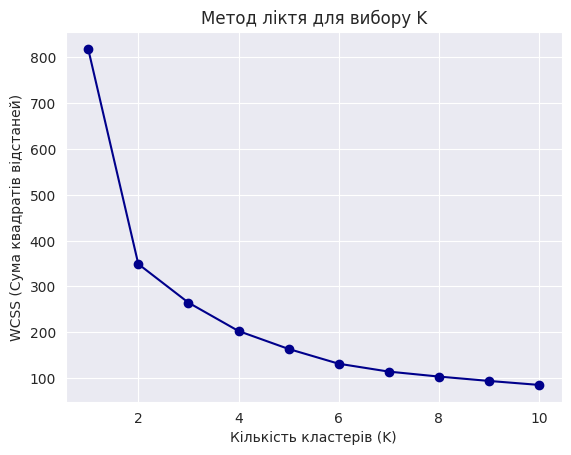

In [198]:
# Масив для збереження WCSS - Within-Cluster Sum of Squares
wcss = []  # сума квадратів відстаней всередині кластерів

# Тестуємо значення K від 1 до 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_2d)
    wcss.append(kmeans.inertia_)

# Будуємо графік
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='darkblue')
plt.xlabel('Кількість кластерів (K)')
plt.ylabel('WCSS (Сума квадратів відстаней)')
plt.title('Метод ліктя для вибору K')
plt.show()

Отже як можна побачити з графіку ліктьового методу оптимальна кількість кластерів дорівнює k=2. Проведемо кластеризацію та додамо до нашого датасету стовпець Cluster, що містить мітки кластерів:

In [199]:
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data_2d)

data_2d['Cluster'] = kmeans.labels_
data_2d

,1,2,Cluster
0,-0.768716,0.460860,0
1,2.687848,2.366961,1
2,-0.201379,0.470430,0
3,0.608496,1.225400,0
4,-0.082282,1.137218,0
...,...,...,...
195,0.629144,4.378584,1
196,-0.723824,5.361801,1
197,1.346107,2.333476,0
198,3.608219,3.411546,1


---
# Візуалізація кластерів
---

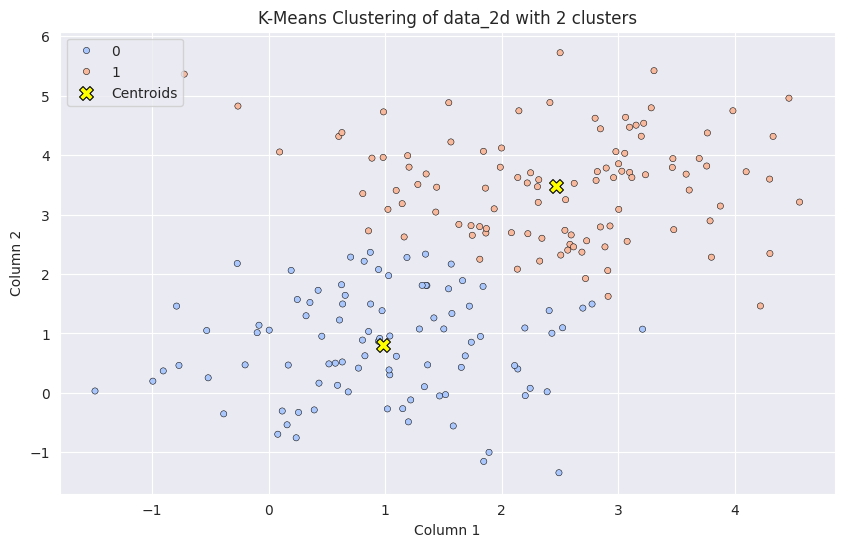

In [200]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Візуалізація кластерів
sns.scatterplot(data=data_2d, x=data_2d.columns[0], y=data_2d.columns[1], 
                hue="Cluster", palette="coolwarm", s=20, edgecolor="k")

# Додаємо центроїди
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
                color="yellow", marker="X", s=100, edgecolor="k", label="Centroids")

# Використовуємо назви перших двох стовпців для підписів осей
plt.xlabel(f'Column {data_2d.columns[0]}')
plt.ylabel(f'Column {data_2d.columns[1]}')

plt.title(f'K-Means Clustering of data_2d with {kmeans.n_clusters} clusters')
plt.legend()
plt.show()

---
# Алгоритм K-means для датасету mnist
---

In [201]:
mnist = pd.read_csv(data_url+'/mnist.csv', header=None)
mnist.shape

(500, 785)

In [202]:
# Відокремлення міток від ознак
X = mnist.iloc[:, 1:].values  # Всі колонки, окрім першої (мітка)
y = mnist.iloc[:, 0].values   # Перша колонка - мітка класу

# Зменшення розмірності до 2D за допомогою PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(500, 2)

In [203]:
print(type(X_pca))

<class 'numpy.ndarray'>


In [204]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    mnist_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    mnist_kmeans.fit(X_pca)
    inertia.append(mnist_kmeans.inertia_)

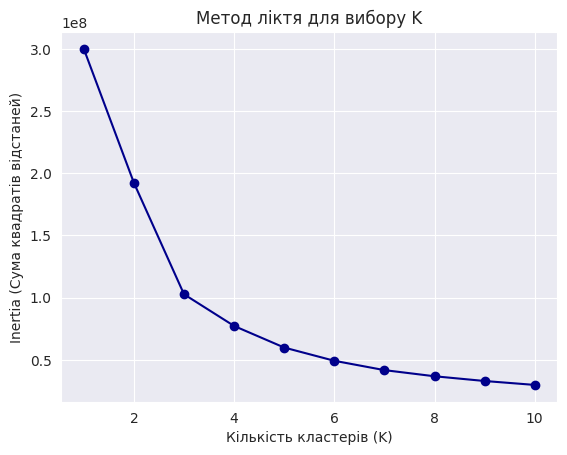

In [205]:

# Будуємо графік
plt.plot(k_range, inertia, marker='o', linestyle='-', color='darkblue')
plt.xlabel('Кількість кластерів (K)')
plt.ylabel('Inertia (Сума квадратів відстаней)')
plt.title('Метод ліктя для вибору K')
plt.show()

In [206]:
# Виконання кластеризації KMeans
mnist_kmeans = KMeans(n_clusters=3, random_state=42)
clusters = mnist_kmeans.fit_predict(X_pca)

X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

X_pca['Clusters'] = clusters

In [207]:
X_pca.shape

(500, 3)

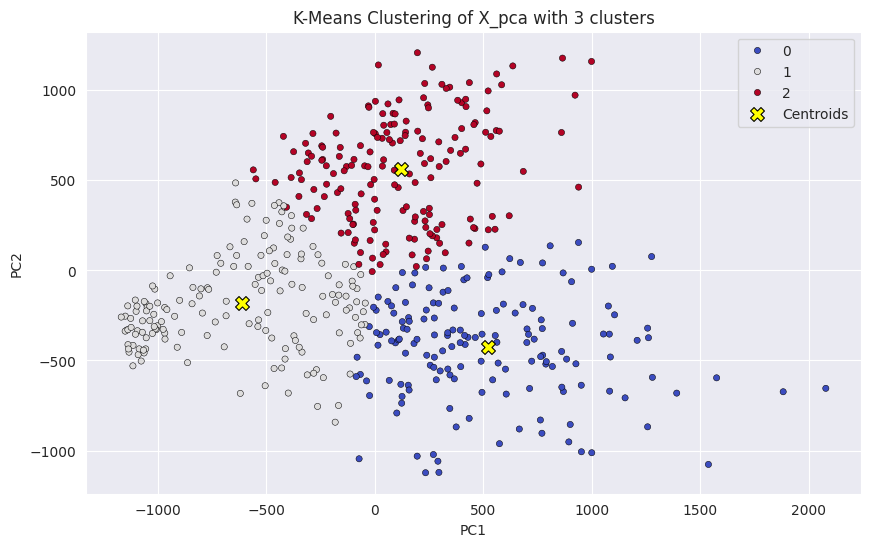

In [208]:

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

sns.scatterplot(data=X_pca, x='PC1', y='PC2', hue="Clusters", palette="coolwarm", s=20, edgecolor="k")

# Додаємо центроїди
sns.scatterplot(x=mnist_kmeans.cluster_centers_[:, 0], y=mnist_kmeans.cluster_centers_[:, 1], 
                color="yellow", marker="X", s=100, edgecolor="k", label="Centroids")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'K-Means Clustering of X_pca with {mnist_kmeans.n_clusters} clusters')
plt.legend()
plt.show()

---
# Висновки
---
Візуалізація результатів алгоритму кластеризації K-means демонструє коректне застосування алгоритму. Завдяки ліктьовому методу була визначена оптимальна кількість кластерів для кожного дата сету.

---
# Extra - Isolation Forest
---

In [209]:
# === Додаємо Isolation Forest ===
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
X_pca["Anomaly_Score"] = iso_forest.fit_predict(X_pca[["PC1", "PC2"]])

# Позначення аномалій (-1 = аномалія, 1 = нормальні точки)
X_pca["Anomaly"] = X_pca["Anomaly_Score"].apply(lambda x: "Anomaly" if x == -1 else "Norm")


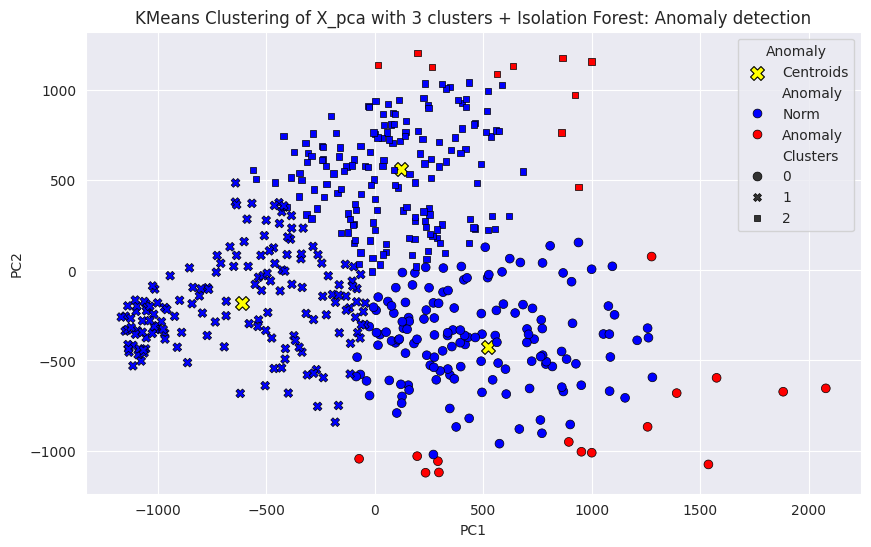

In [210]:
# Візуалізація кластерів
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

sns.scatterplot(x=mnist_kmeans.cluster_centers_[:, 0], y=mnist_kmeans.cluster_centers_[:, 1], 
                color="yellow", marker="X", s=100, edgecolor="k", label="Centroids")

sns.scatterplot(data=X_pca, x="PC1", y="PC2", hue="Anomaly", style="Clusters",
                palette={"Norm": "blue", "Anomaly": "red"}, s=40, edgecolor="k")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f"KMeans Clustering of X_pca with {mnist_kmeans.n_clusters} clusters + Isolation Forest: Anomaly detection")
plt.legend(title="Anomaly")
plt.show()